Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

Load the Dataset

In [ ]:
data = pd.read_csv('/content/car.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


 Data Preprocessing

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values for numeric columns only
for col in data.select_dtypes(include=np.number):
    data[col].fillna(data[col].mean(), inplace=True)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']  # Replace these with actual column names
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [ ]:
print(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [ ]:
categorical_columns =['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,11,59,57,86,2,0,1,0
1,93,10,78,104,135,1,0,1,0
2,68,14,112,106,26,2,0,1,0
3,96,8,52,49,18,2,0,1,0
4,92,11,76,73,134,1,0,1,0


In [ ]:
# Correct list of numeric columns
numeric_columns = ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,1.074323,0.128897,-0.172981,-0.274990,-0.240142,0.500183,-0.737285,0.39148,-0.188098
1,1.191828,-0.217514,0.268858,0.808050,0.617243,-1.852241,-0.737285,0.39148,-0.188098
2,0.212627,1.168129,1.059518,0.854137,-1.290002,0.500183,-0.737285,0.39148,-0.188098
3,1.309332,-0.910335,-0.335764,-0.459337,-1.429983,0.500183,-0.737285,0.39148,-0.188098
4,1.152659,0.128897,0.222349,0.093705,0.599745,-1.852241,-0.737285,0.39148,-0.188098


Train-Test Split

In [ ]:
# Define the features (X) and the target variable (y)
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training

In [ ]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression R2 Score:', r2_score(y_test, y_pred_lr))

Linear Regression MSE: 130.7943297598554
Linear Regression R2 Score: 0.9276905705798472


In [ ]:
# Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))


Random Forest MSE: 69.22811147540983
Random Forest R2 Score: 0.9617273527849977


Model Evaluation

In [ ]:
print("Linear Regression: MSE =", mean_squared_error(y_test, y_pred_lr), "R² Score =", r2_score(y_test, y_pred_lr))
print("Random Forest: MSE =", mean_squared_error(y_test, y_pred_rf), "R² Score =", r2_score(y_test, y_pred_rf))

Linear Regression: MSE = 130.7943297598554 R² Score = 0.9276905705798472
Random Forest: MSE = 69.22811147540983 R² Score = 0.9617273527849977


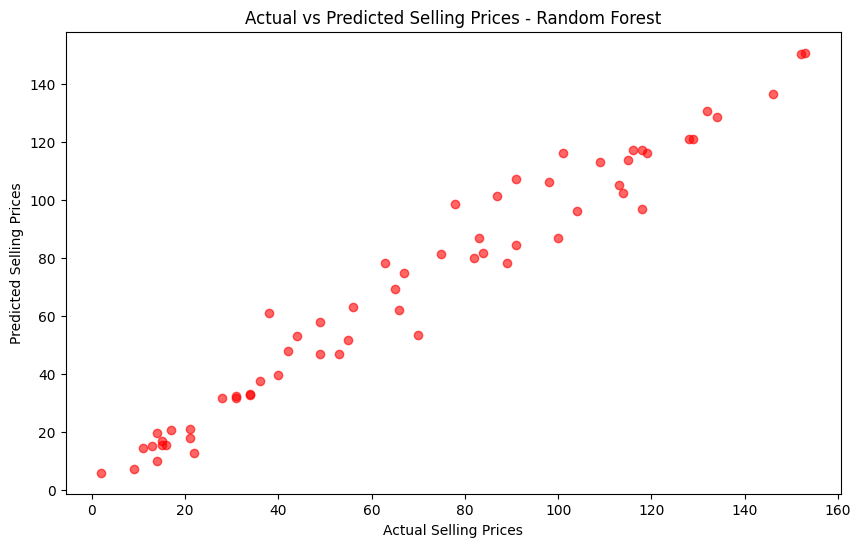

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='r')
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices - Random Forest')
plt.show()

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters for Random Forest:", grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
